In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Data Preparation**

In [4]:
data = pd.read_csv('data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
(data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Changing zero value cells to medians of its columns**

In [7]:
from sklearn.impute import SimpleImputer
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_invalid_zeros] = data[cols_with_invalid_zeros].replace(0, np.nan)

imputer = SimpleImputer(strategy='median')
data[cols_with_invalid_zeros] = imputer.fit_transform(data[cols_with_invalid_zeros])

(data == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Visualizing data after cleaning**

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


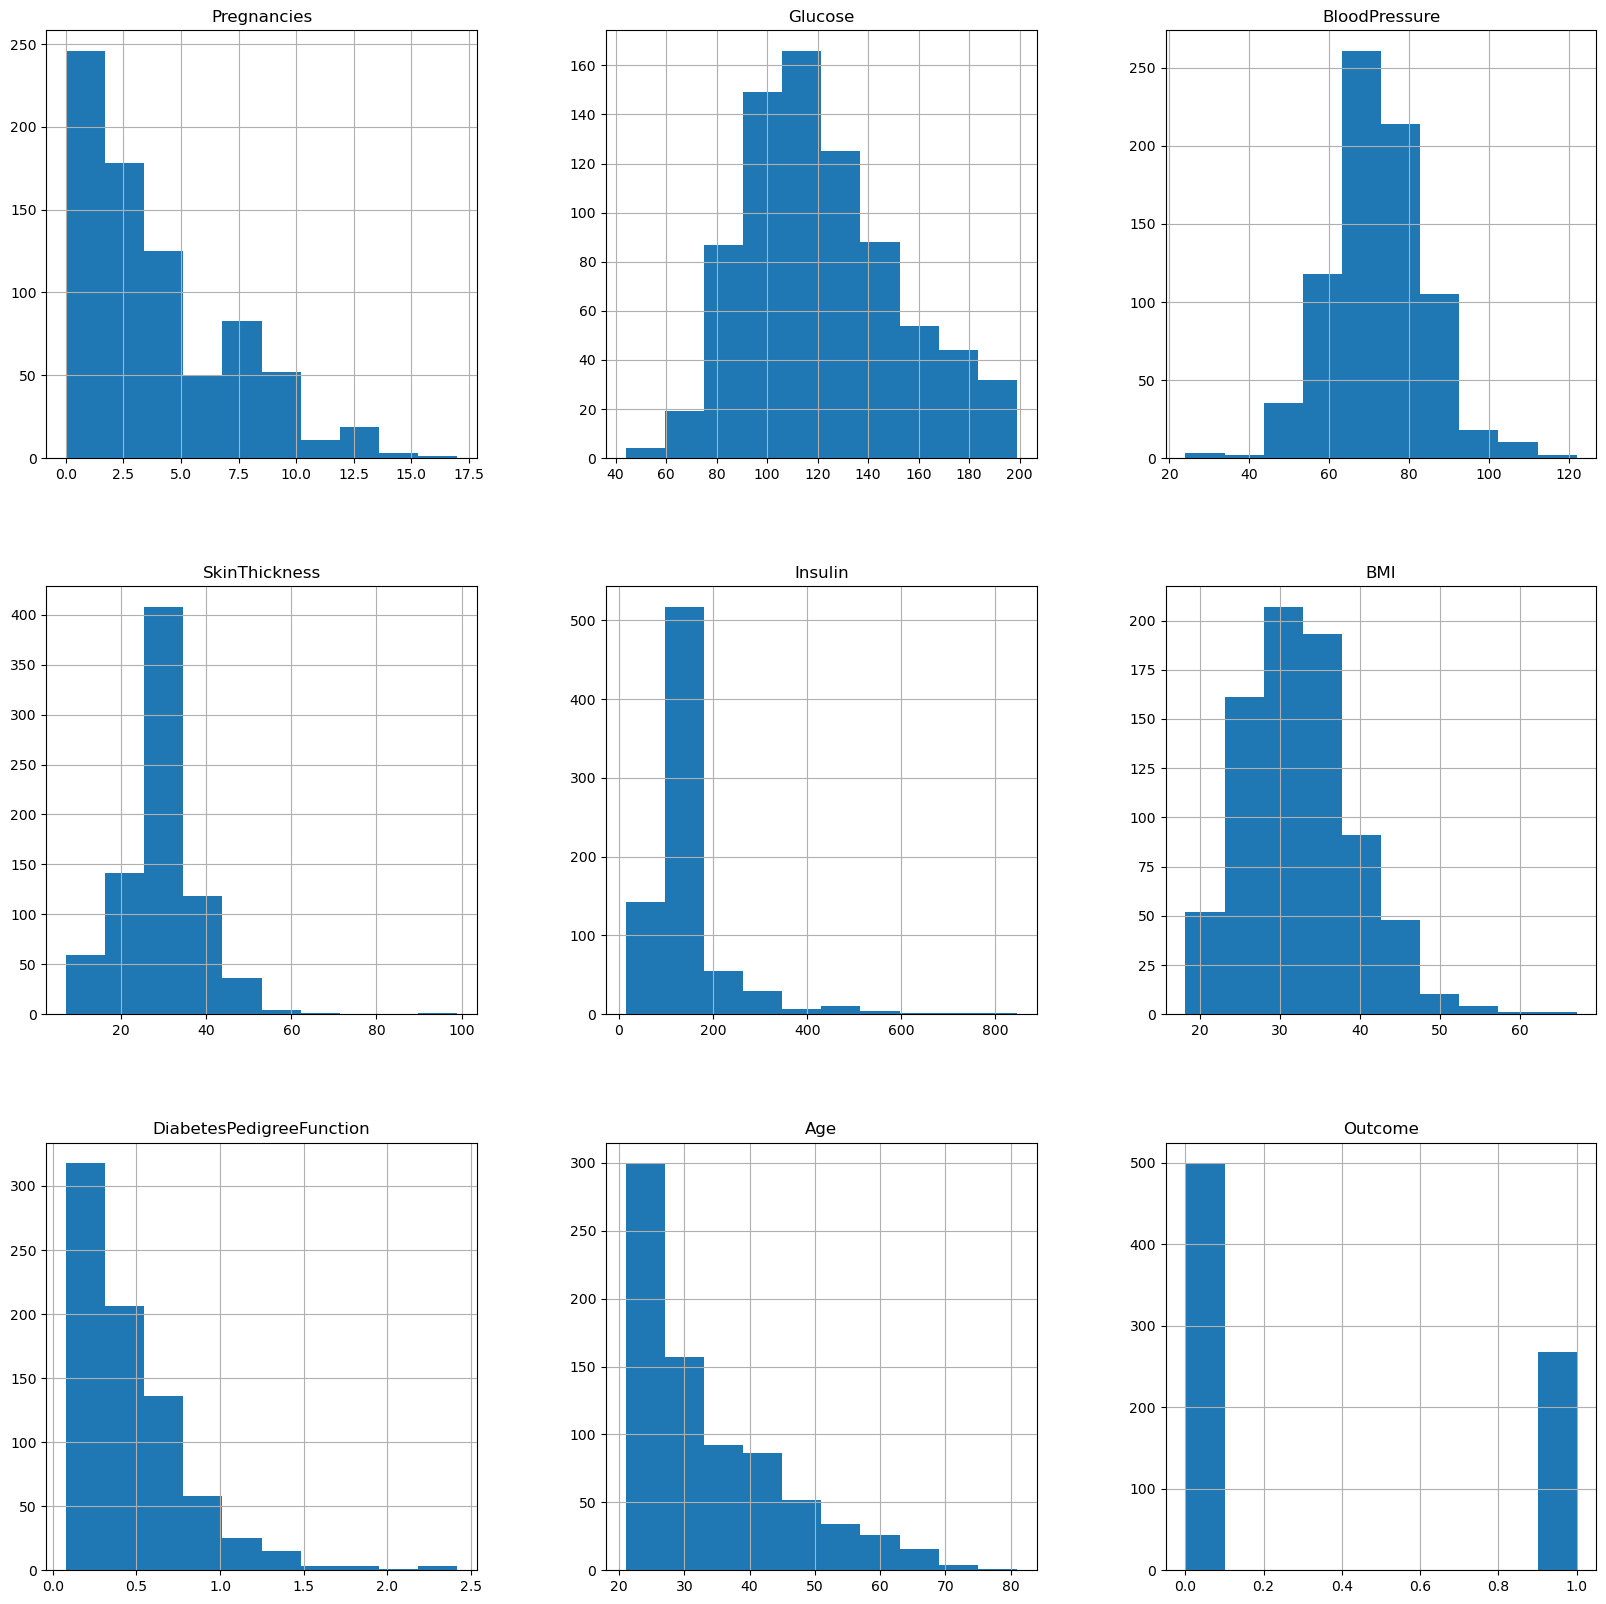

In [9]:
p = data.hist(figsize=(20,20))

c:\Users\huber\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\huber\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\huber\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\huber\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

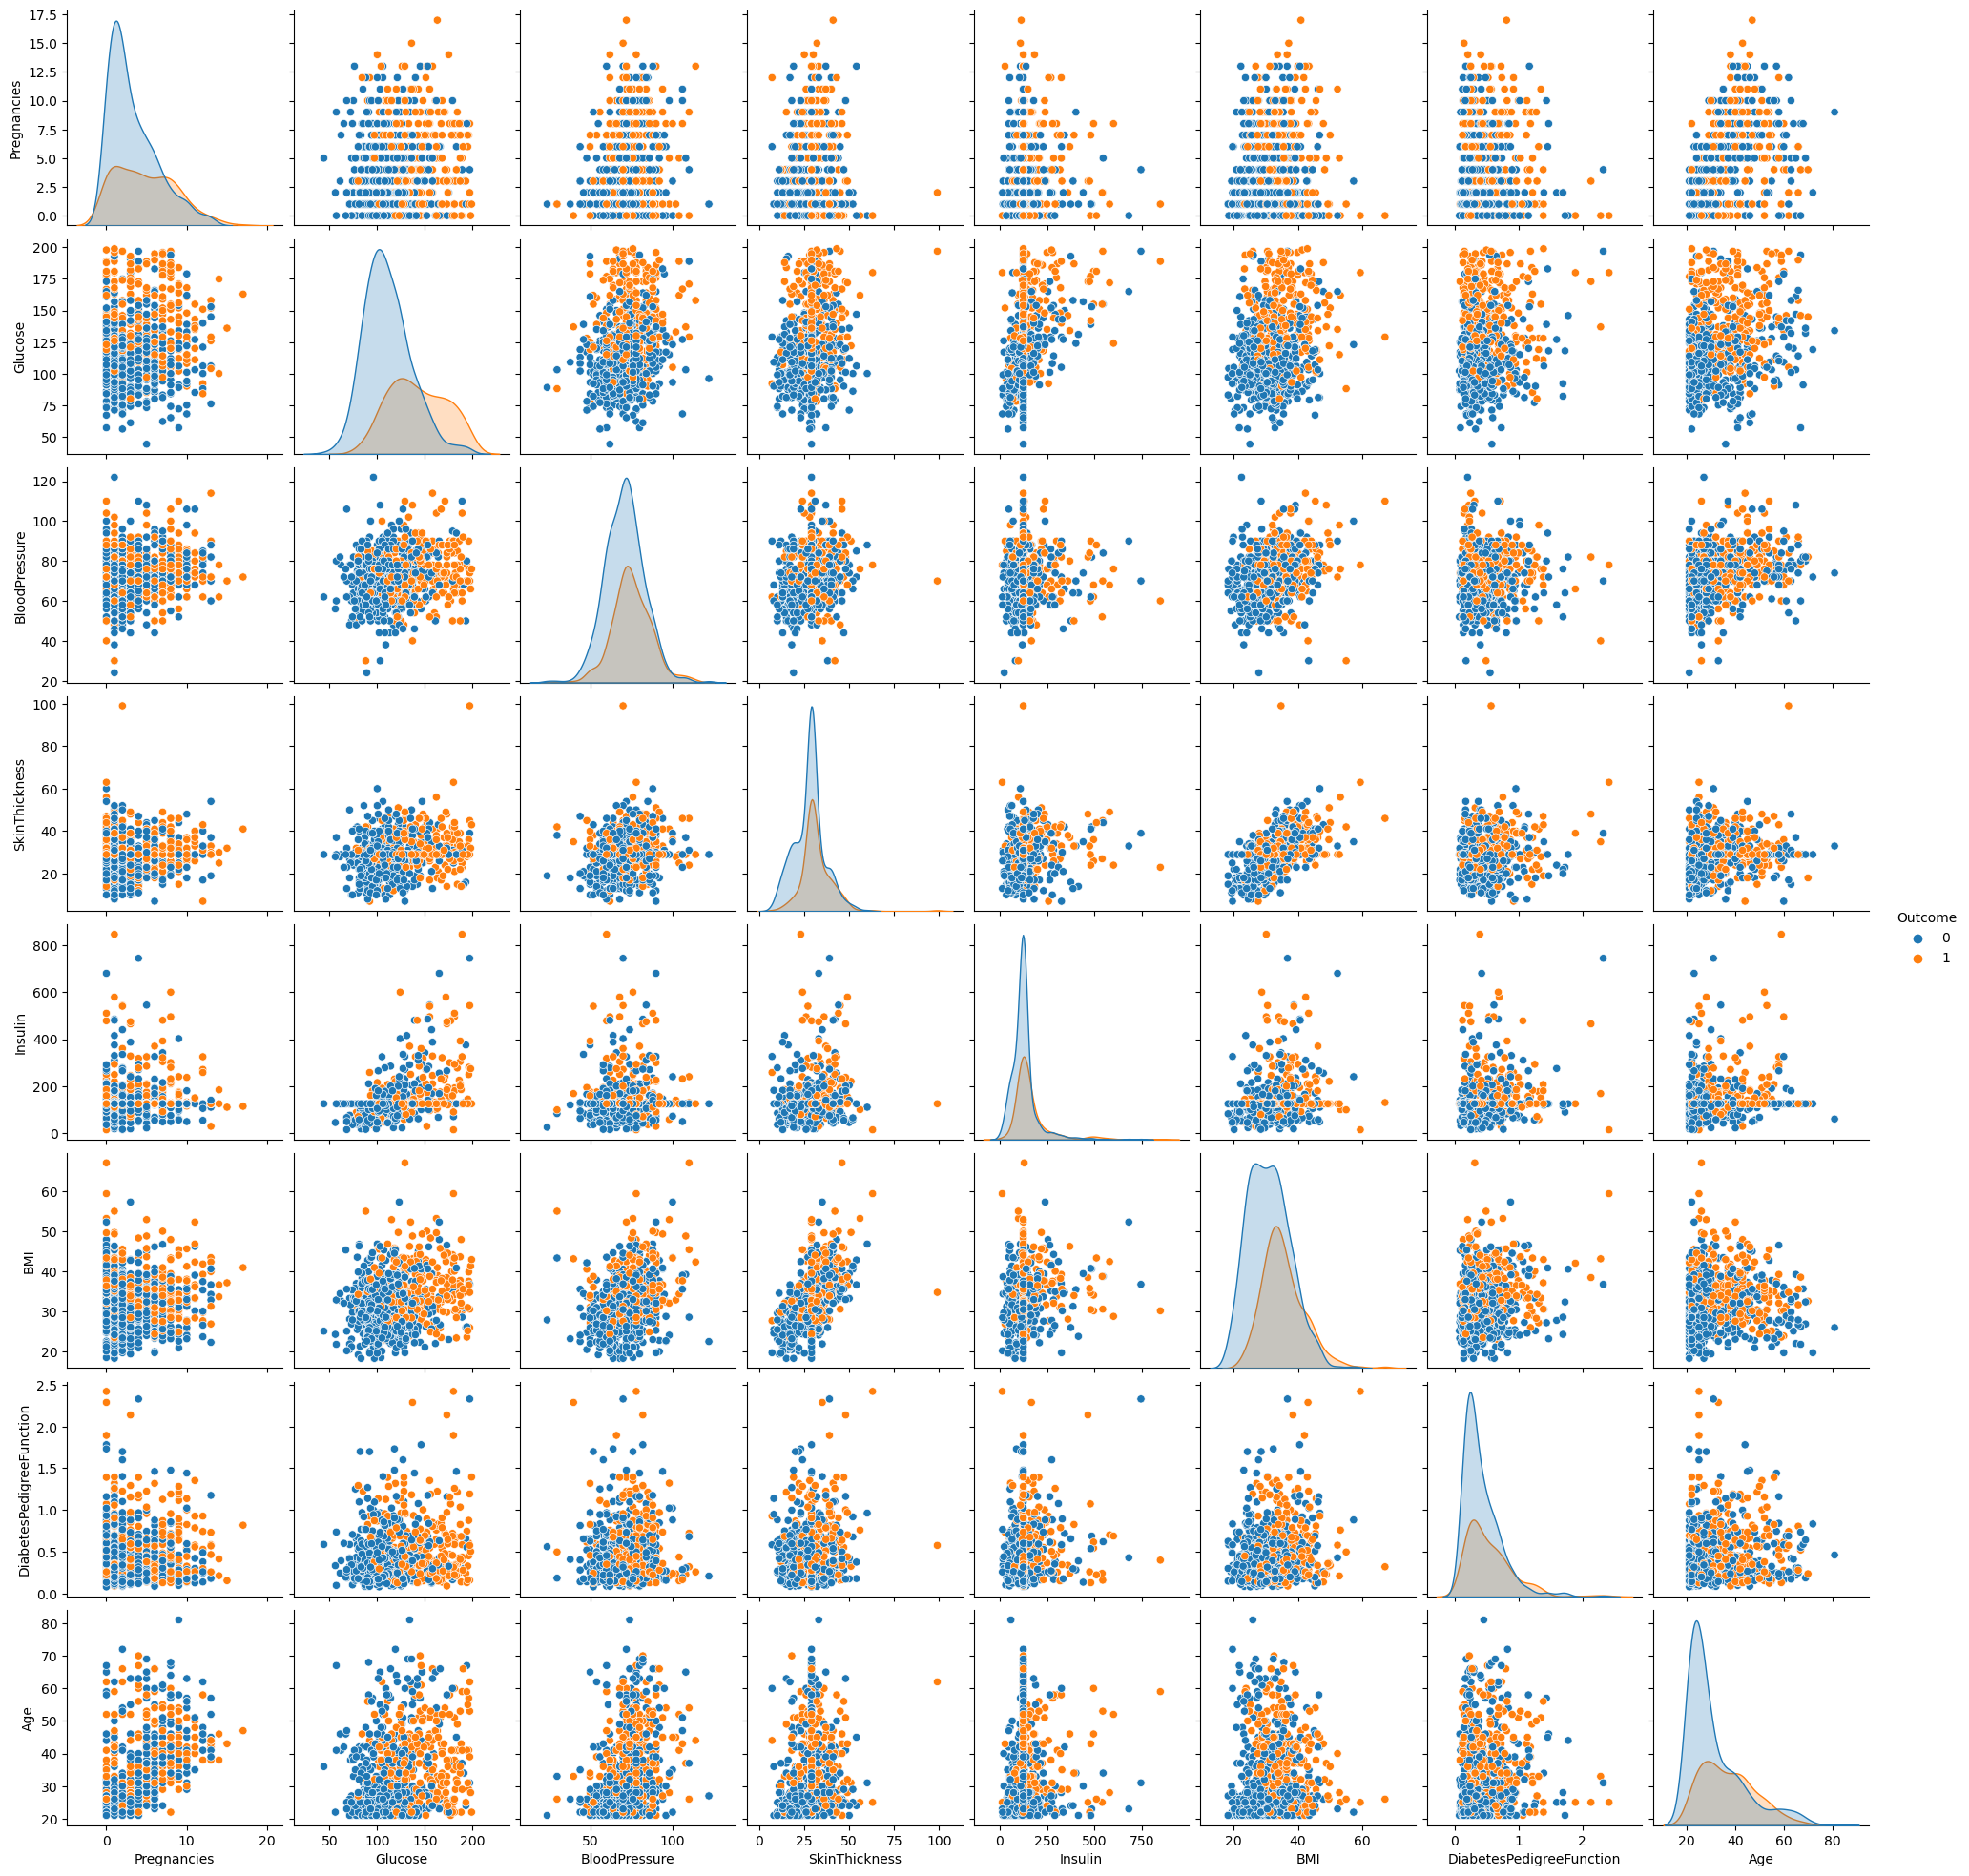

In [10]:
p = sns.pairplot(data, hue='Outcome')

**Scaling data to 0.0-1.0 range** 

In [11]:
from sklearn.preprocessing import MinMaxScaler

X = data.drop('Outcome', axis=1).values.astype(np.float32)
y = data['Outcome'].values.astype(np.int64)

# Scaler that will be fit only on the training split later
scaler = MinMaxScaler(feature_range=(0, 1))

# Separate scaler for preview/plots so the training scaler stays unfitted
_preview_scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(
    _preview_scaler.fit_transform(data.drop('Outcome', axis=1)),
    columns=data.columns[:-1],
)
df['Outcome'] = y

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


c:\Users\huber\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\huber\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'After Scaling')

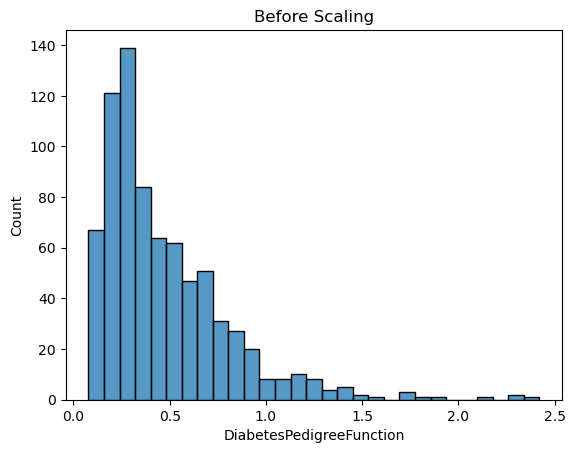

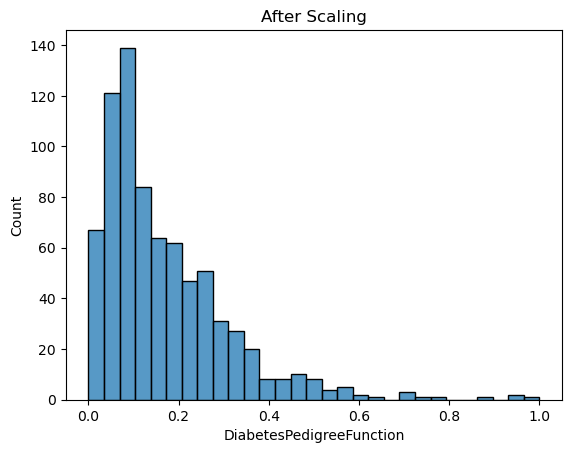

In [12]:
plt.figure()
sns.histplot(data['DiabetesPedigreeFunction'])
plt.title('Before Scaling')
plt.figure()
sns.histplot(df['DiabetesPedigreeFunction'])
plt.title('After Scaling')

In [13]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp
)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train.shape, X_valid.shape, X_test.shape

((536, 8), (116, 8), (116, 8))

In [14]:
from nn import NeuralNetwork

In [ ]:
nn = NeuralNetwork(
    input_size=X_train.shape[1],
    hidden_size=8,
    output_size=1,
    activation="sigmoid",
    learning_rate=0.003, 
    beta1=0.9,            
    beta2=0.999,         
    epsilon=1e-8,         
    batch_size= 24,
    l2_lambda=0.001, 
    dropout_rate=0.1,  
    early_stopping_patience=100,  
    max_epochs=1000,
    seed=42
)

history = nn.train(X_train, y_train, X_val=X_valid, y_val=y_valid, verbose=True)

y_test_pred = nn.predict(X_test)
test_acc = (y_test_pred.reshape(-1) == y_test).mean()
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Validation Accuracy from history: {history['val_accuracy'][-1]*100:.2f}%")




ROZPOCZĘCIE TRENINGU (Adam Optimizer)
Epoch    0 | Loss: 0.146095 | Train Acc: 34.89% | Val Acc: 35.34%
Epoch    1 | Loss: 0.129481 | Train Acc: 34.89% | Val Acc: 35.34%
Epoch    2 | Loss: 0.120589 | Train Acc: 65.11% | Val Acc: 64.66%
Epoch    3 | Loss: 0.116446 | Train Acc: 65.11% | Val Acc: 64.66%
Epoch    4 | Loss: 0.114651 | Train Acc: 65.11% | Val Acc: 64.66%
Epoch  100 | Loss: 0.077575 | Train Acc: 75.93% | Val Acc: 76.72%
Epoch  100 | Loss: 0.077575 | Train Acc: 75.93% | Val Acc: 76.72%
Epoch  200 | Loss: 0.075281 | Train Acc: 78.36% | Val Acc: 76.72%
Epoch  200 | Loss: 0.075281 | Train Acc: 78.36% | Val Acc: 76.72%
Epoch  300 | Loss: 0.074955 | Train Acc: 78.36% | Val Acc: 76.72%
Epoch  300 | Loss: 0.074955 | Train Acc: 78.36% | Val Acc: 76.72%
Epoch  400 | Loss: 0.074563 | Train Acc: 78.73% | Val Acc: 76.72%
Epoch  400 | Loss: 0.074563 | Train Acc: 78.73% | Val Acc: 76.72%

[Epoch 468] Validation loss hasn't improved for 100 epochs. Stopping.

ZAKOŃCZENIE TRENINGU
Przyczyna z

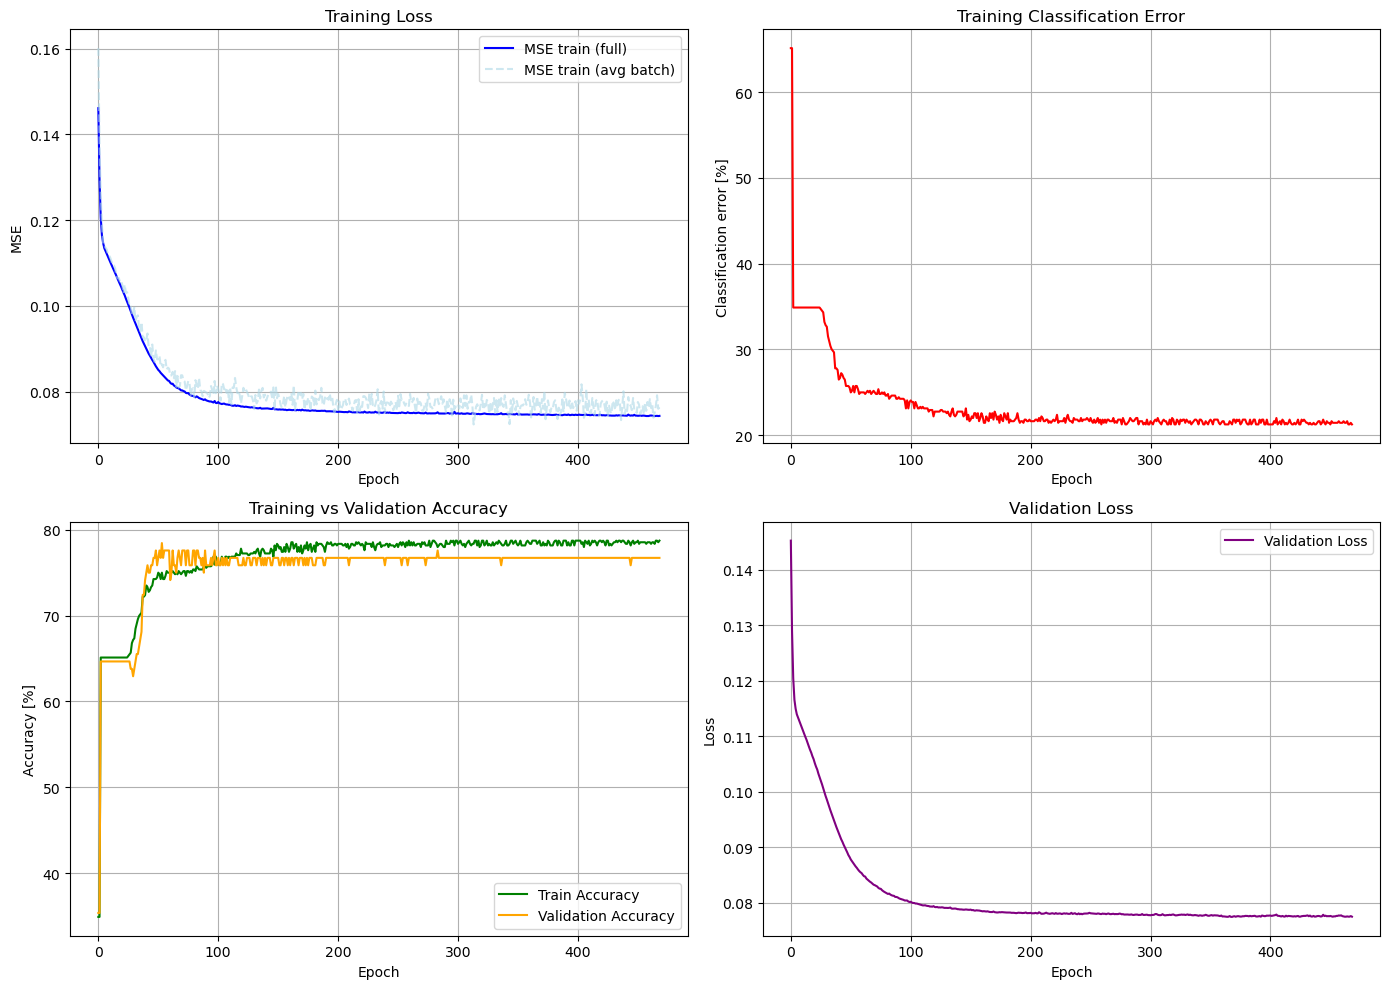

In [ ]:
epochs = history["epoch"]
train_accuracy = history["train_accuracy"]
val_accuracy = history["val_accuracy"]
val_loss = history["val_loss"]


fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].plot(epochs, history["loss_full"], label="MSE train (full)", color='blue')
axs[0, 0].plot(epochs, history["loss_batches"], label="MSE train (avg batch)", 
               linestyle="--", alpha=0.6, color='lightblue')
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("MSE")
axs[0, 0].set_title("Training Loss")
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].plot(epochs, np.array(history["class_error_full"]) * 100.0, color='red')
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Classification error [%]")
axs[0, 1].set_title("Training Classification Error")
axs[0, 1].grid(True)

axs[1, 0].plot(epochs, np.array(train_accuracy) * 100, label="Train Accuracy", color='green')
axs[1, 0].plot(epochs, np.array(val_accuracy) * 100, label="Validation Accuracy", color='orange')
axs[1, 0].set_xlabel("Epoch")
axs[1, 0].set_ylabel("Accuracy [%]")
axs[1, 0].set_title("Training vs Validation Accuracy")
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].plot(epochs, val_loss, label="Validation Loss", color='purple')
axs[1, 1].set_xlabel("Epoch")
axs[1, 1].set_ylabel("Loss")
axs[1, 1].set_title("Validation Loss")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        76
           1       0.62      0.60      0.61        40

    accuracy                           0.73       116
   macro avg       0.70      0.70      0.70       116
weighted avg       0.73      0.73      0.73       116



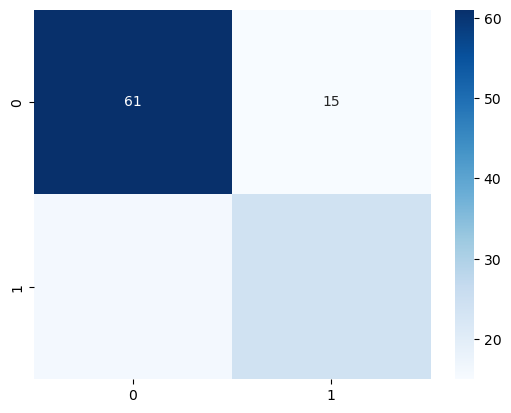

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_pred = nn.predict(X_test)
y_pred_classes = (y_pred.reshape(-1) >= 0.5).astype(np.int64)
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
print("\nClassification Report:")   
print(classification_report(y_test, y_pred_classes))